# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorpweather_api_keyorated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | tsihombe.
City not found...skipping tsihombe.
Processing Record 1  of Set 1 | vila do maio.
Processing Record 2  of Set 1 | feijo.
Processing Record 3  of Set 1 | taywarah.
Processing Record 4  of Set 1 | upernavik.
Processing Record 5  of Set 1 | ushuaia.
Processing Record 6  of Set 1 | butaritari.
Processing Record 7  of Set 1 | amderma.
City not found...skipping amderma.
Processing Record 8  of Set 1 | saldanha.
Processing Record 9  of Set 1 | punta arenas.
Processing Record 10  of Set 1 | hithadhoo.
Processing Record 11  of Set 1 | bluff.
Processing Record 12  of Set 1 | khorinsk.
Processing Record 13  of Set 1 | meulaboh.
Processing Record 14  of Set 1 | tasiilaq.
Processing Record 15  of Set 1 | rikitea.
Processing Record 16  of Set 1 | husavik.
Processing Record 17  of Set 1 | broken hill.
Processing Record 18  of Set 1 | puerto ayora.
Processing Record 19  of Set 1 | berlevag.
Processing Reco

Processing Record 22  of Set 4 | el badari.
City not found...skipping el badari.
Processing Record 23  of Set 4 | rantepao.
Processing Record 24  of Set 4 | kodiak.
Processing Record 25  of Set 4 | ostersund.
Processing Record 26  of Set 4 | ponta delgada.
Processing Record 27  of Set 4 | kushima.
Processing Record 28  of Set 4 | duluth.
Processing Record 29  of Set 4 | mizan teferi.
Processing Record 30  of Set 4 | lima.
Processing Record 31  of Set 4 | saint-pierre.
Processing Record 32  of Set 4 | nara.
Processing Record 33  of Set 4 | anito.
Processing Record 34  of Set 4 | varna.
Processing Record 35  of Set 4 | cadillac.
Processing Record 36  of Set 4 | kieta.
Processing Record 37  of Set 4 | bagdarin.
Processing Record 38  of Set 4 | talnakh.
Processing Record 39  of Set 4 | balikpapan.
Processing Record 40  of Set 4 | tuy hoa.
Processing Record 41  of Set 4 | yashan.
Processing Record 42  of Set 4 | belyy yar.
Processing Record 43  of Set 4 | pochutla.
Processing Record 44  of 

Processing Record 5  of Set 8 | galle.
Processing Record 6  of Set 8 | pamanukan.
Processing Record 7  of Set 8 | borogontsy.
Processing Record 8  of Set 8 | boz.
Processing Record 9  of Set 8 | gubkinskiy.
Processing Record 10  of Set 8 | khasan.
Processing Record 11  of Set 8 | zdvinsk.
Processing Record 12  of Set 8 | hobyo.
Processing Record 13  of Set 8 | louisbourg.
City not found...skipping louisbourg.
Processing Record 14  of Set 8 | grand gaube.
Processing Record 15  of Set 8 | lesozavodsk.
Processing Record 16  of Set 8 | sechura.
Processing Record 17  of Set 8 | klaksvik.
Processing Record 18  of Set 8 | zambezi.
Processing Record 19  of Set 8 | arrecife.
Processing Record 20  of Set 8 | punto fijo.
Processing Record 21  of Set 8 | maldonado.
Processing Record 22  of Set 8 | inderborskiy.
City not found...skipping inderborskiy.
Processing Record 23  of Set 8 | raga.
Processing Record 24  of Set 8 | nabire.
Processing Record 25  of Set 8 | tulu bolo.
Processing Record 26  of 

Processing Record 33  of Set 11 | tessalit.
Processing Record 34  of Set 11 | wicklow.
Processing Record 35  of Set 11 | beloha.
Processing Record 36  of Set 11 | houma.
Processing Record 37  of Set 11 | denpasar.
Processing Record 38  of Set 11 | mgachi.
Processing Record 39  of Set 11 | opuwo.
Processing Record 40  of Set 11 | grootegast.
Processing Record 41  of Set 11 | maroantsetra.
Processing Record 42  of Set 11 | sangar.
Processing Record 43  of Set 11 | ambatondrazaka.
Processing Record 44  of Set 11 | westerland.
Processing Record 45  of Set 11 | mapiripan.
Processing Record 46  of Set 11 | ulcinj.
Processing Record 47  of Set 11 | santa fe.
Processing Record 48  of Set 11 | sorland.
Processing Record 49  of Set 11 | de-kastri.
Processing Record 0  of Set 12 | norman wells.
Processing Record 1  of Set 12 | viransehir.
Processing Record 2  of Set 12 | smithers.
Processing Record 3  of Set 12 | nanortalik.
Processing Record 4  of Set 12 | auchtermuchty.
Processing Record 5  of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Data Count
weather_df.count()

City                611
Country             611
Date                611
Latitude            611
Longitude           611
Cloudiness (%)      611
Humidity (%)        611
Max Temp (F)        611
Wind Speed (mph)    611
dtype: int64

In [5]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,tsihombe,,,,,,,,
1,vila do maio,CV,2020-04-14 13:04:48,15.13,-23.22,75,51,82.67,10.3
2,feijo,BR,2020-04-14 13:04:49,-8.16,-70.35,6,48,91.544,2.52
3,taywarah,AF,2020-04-14 13:04:49,33.35,64.42,54,40,39.956,1.38
4,upernavik,GL,2020-04-14 13:04:49,72.79,-56.15,100,94,24.404,3.98


In [6]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


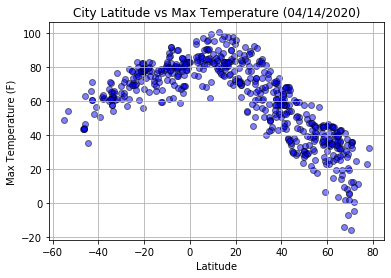

In [7]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid(True)
print("The plot proves that as we generally move away from the equator, temperature drops")

#### Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


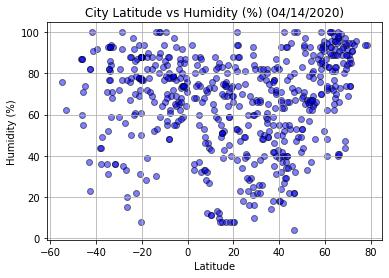

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

#### Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


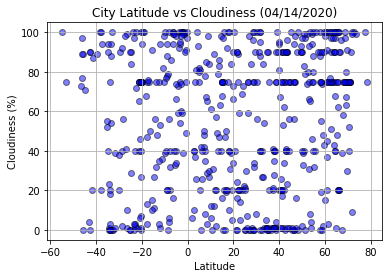

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

#### Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


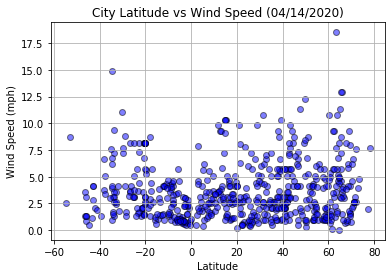

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.06x + 97.51
The r-squared is: -0.8832120562642449
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


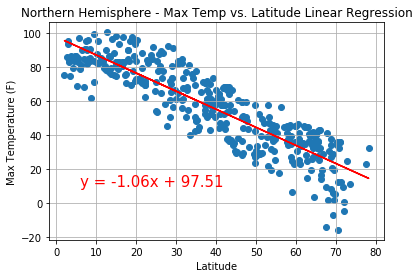

In [12]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.57x + 82.92
The r-squared is: 0.725172750463841
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


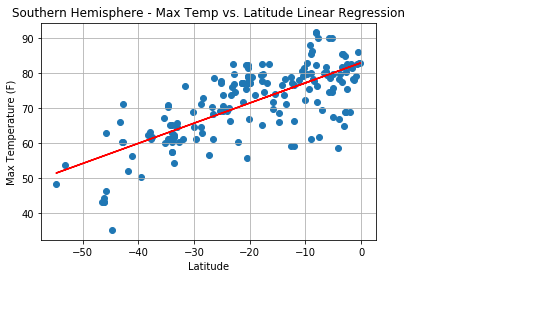

In [13]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.47x + 45.44
The r-squared is: 0.3949043882802023
The regression does not display much of a correlation between the data sets.


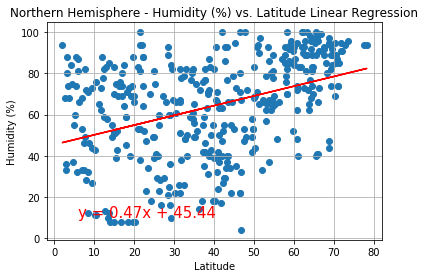

In [14]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.13x + 74.45
The r-squared is: 0.09456957568247225
The regression does not display much of a correlation between the data sets.


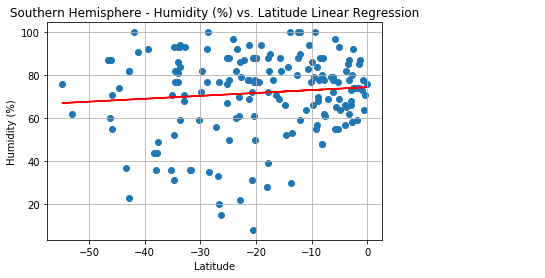

In [15]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 36.66
The r-squared is: 0.2518087061809958
The regression does not display much of a correlation between the data sets.


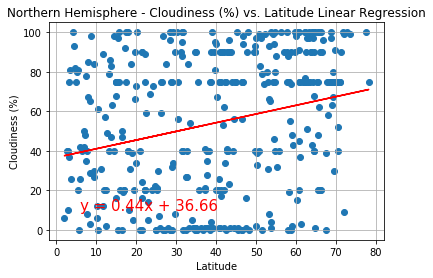

In [16]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 66.06
The r-squared is: 0.16195629002110593
The regression does not display much of a correlation between the data sets.


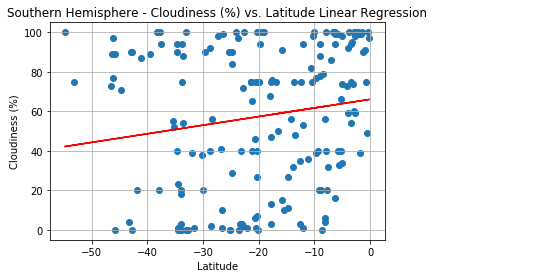

In [17]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 3.2
The r-squared is: 0.11373559820567133
The regression does not display much of a correlation between the data sets.


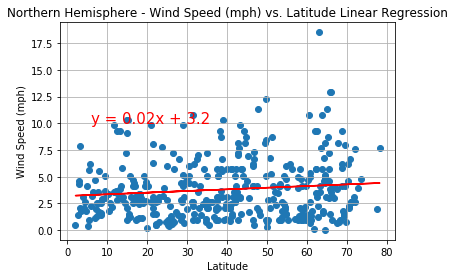

In [20]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 2.23
The r-squared is: -0.29413042540313705
The regression does not display much of a correlation between the data sets.


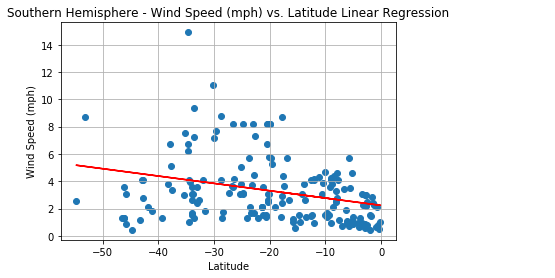

In [21]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()